### HW 1: <font color=green>Solutions</font> <br>

__Total: 25 pts__

Start date: <font color=red>Tuesday Sept. 3</font> <br>
Due date: <font color=red>Tuesday Sept. 10</font>

If you don't already have a version of anaconda installed, start by downloading anaconda and installing it (see for example [here](https://machinelearningmastery.com/setup-python-environment-machine-learning-deep-learning-anaconda/)). When working on the exercises below, keep in mind that there exists a rich python documentation online. Don't hesitate to check the documentation and examples related to the functions you want to use. 

__1. (4pts) Numerical Linear Algebra: Numpy__

- Start by building a 10 by 10 matrix of random Gaussian entries. Then compute the two largest eigenvalues of the matrix
- Reshape the matrix that you built above into a 2 by 50 array (call it $v$) first and into a single vector then (call it 'w'). Return the vector obtained by sorting the elements of $w$ in descending order
- Generate two random vectors (you can choose the distribution you use to generate the entries). Let us call those vectors $v1$ and $v2$. Stack those vectors vertically then horizontally. Store the respective results in two matrices $A$ and $B$.
- Do the same with two random arrays $C_1 \in \mathbb{R}^{n\times n}$ and $C_2^{n\times n}$. Store the results in the variables $Cv$ and $Ch$

In [ ]:
import numpy as np
from numpy import linalg as LA

M = np.random.normal(0, 1, (10, 10))
w, v = LA.eig(M)


# Here since I didn't specify anything, you can either return the eigenvalue with the largest real part, 
# the largest imaginary part, let numpy choose by just aplying sort to the vector of complex eigenvalues, 
# or, what I decide to do here, return the eigenvalues with the largest modulus.   

indices = np.argsort(np.absolute(w))
indices = indices[::-1]
w = w[indices]


print "first eigenvalue:", w[0] 
print "second eigenvalue:", w[1]

M_reshape_v = np.reshape(M, (2, 50))
M_reshape_w = np.reshape(M, (1, 100))
M_reshape_w_sorted = np.sort(M_reshape_w)
M_reshape_w_sorted = M_reshape_w_sorted[:,::-1] # get the elements in descending order


# to change I decide to generate random integers between 0 and n
v1 = np.random.randint(10, size=(1, 10))
v2 = np.random.randint(10, size=(1, 10))

vertical_stack  = np.vstack((v1,v2))
horizontal_stack  = np.hstack((v1,v2))

C1 = np.random.randint(10, size = (10,10))
C2 = np.random.randint(10, size = (10,10))

Cv  = np.vstack((C1,C2))
Ch  = np.hstack((C1,C2))


__2. (2pts) Towards multiclass classification: one-hot encoding__

- Generate a vector (let us call it $v$) of integers taking values between 0 and 9. 
- Then build the vector corresponding to the one-hot encoding of each entry in $v$ (a one-hot encoding represents each categorical variable (0 to 9 digits in your vector $v$ by using binary sequences in which only one entry (for example the one corresponding to the digit that is encoded) is non zero))

In [ ]:
# you were free to choose the size you wanted

vv = np.random.randint(9, size = (10,))

# there are many valid approaches. One of them is to build a matrix of zeros and then put 
# one at the column index corresponding to the number in vv
print(vv)
oneHotEncoding_vv = np.zeros((10,10))

oneHotEncoding_vv[np.arange(10),vv] = 1



__3. (6pt) Towards regression: sampling and matplolib__

__3a. (2pts) One dimensional__ In this exercise, we will successively generate points according to a function, sample pairs (t,f) from that distribution and plot the results

- Using the 'linspace' function from numpy, generate $1000$ pairs $(t, f(t) = \frac{1}{1+e^{-t}})$ for values of $t$ between $-6$ and $6$. What does the function look like? 
- Generate 100 random pairs $(t_i, f_i)$ from the plot. Then plot the points $(t_i,x_i)$ on top of the line $(t, f(t))$ using matplotlib (you can choose how you randomly generate the points)

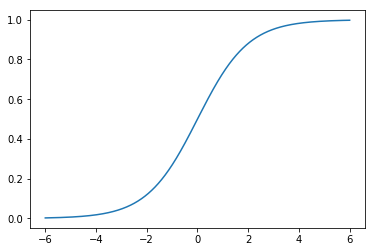

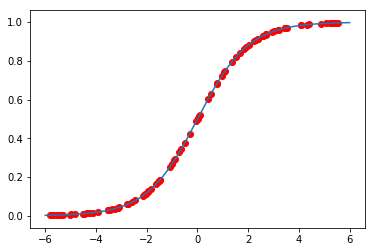

In [28]:
# first generate te pairs

t = np.linspace(-6.0, 6.0, num=1000)
f = np.reciprocal(1+np.exp(-t))

# Then plot the function using pyplot

import matplotlib.pyplot as plt
plt.plot(t, f)
plt.show()

# As we want to sample without replacement, we can use the function 'sample' from random

from random import sample 

sampleData = np.random.choice(t, 100)
f_sampleData = np.reciprocal(1+np.exp(-sampleData))

# Then we use Scatter to plot the samples

plt.scatter(sampleData, f_sampleData, c = 'red')
plt.plot(t, f)
plt.show()




__3b. (4pts) The two dimensional hyperplane__

- An extension of the previous case, we now want to generate triples $(x,y, t)$ according to the following hyperplane: 

$$t \equiv\pi(x, y) = x + y +1$$

using _Axes3D_, _matplolib_ and _pyplot_, as well as the _meshgrid( )_ and _arrange( )_ functions from numpy and the _plot_surface( )_ and _scatter( )_ functions from pyplot,

- Generate a regular grid of points $(x, y)$ covering the domain $[-20,20]\times [-20,20]$. Let us say 200 by 200. 
- As in the 1D case, we now want to generate noisy samples that are lying on the plane on average. Start by generating $(50\times 50)$ triples $(x,y,\pi(x,y))$ covering the domain $[-20,20]\times [-20,20]$. 
- Perturb the $50\times 50$ pairs by adding to them a random gaussian noise of amplitude no larger than $0.1$
- Finally using the _scatter( )_ function from pyplot, plot the noisy samples on top of the plane. 


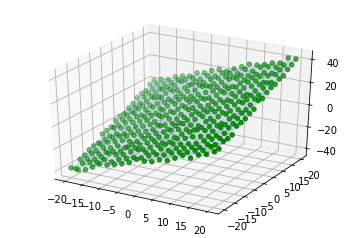

In [40]:
import numpy as np

x = np.linspace(-20, 20, 200)
y = np.linspace(-20, 20, 200)
xv, yv = np.meshgrid(x, y)

tv = xv + yv + 1


tv = tv+ np.random.normal(0, .1, (200,200))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

# plot the plane
ax.plot_surface(xv, yv, tv, alpha=0.2)

# Although this was not part of the erxercise, I downsample the points to get a clear picture

x = np.linspace(-20, 20, 20)
y = np.linspace(-20, 20, 20)
xv2, yv2 = np.meshgrid(x, y)


# I also increased the variance a little to emphasize the noise
tv2 = xv2 + yv2 + 1 + np.random.normal(0, 1, (20,20))


ax.scatter(xv2.flatten() , yv2.flatten() , tv2.flatten(),  color='green')

plt.show()



__4. (3pts) Getting started with Pandas and Kaggle datasets__

__4a__ Download the car dataset on [Kaggle](https://www.kaggle.com/toramky/automobile-dataset/downloads/automobile-dataset.zip/2) and open this dataset with pandas. 

- Display a couple (5-10) of rows from the pandas data frame.  
- Find the brand that has the highest average price across cars
- Sort the cars according to their horse power and return the corresponding panda frame. Display the first 10 lines from the frame.


In [73]:
# There are several ways to answer the question. I give one

import pandas as pd
data = pd.read_csv("Automobile_data 3.csv")

# printing first 10 rows
data.head(10)

# I remove the rows that do not contain a number for the price
data = data[(data.astype(str) != '?').all(axis=1)]


 # returning the brands
Brand_names = data.make.unique()

averages = np.zeros((Brand_names.size,))
k=0

for i in Brand_names:
    
    tmp = data.loc[data['make'] == i]
    tmp = tmp['price'].astype(int)
    averages[k] = np.mean(tmp)
    k += 1
     

columns = Brand_names
rows = ["averages"]
data = np.array([averages])
averageData = pd.DataFrame(data=data, index=rows, columns=columns)


averageData

# The last one is one line



,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
averages,18246.25,18857.5,6007.0,7790.125,8184.692308,32250.0,9080.0,29726.4,7813.0,10415.666667,15758.571429,7163.333333,22018.0,15223.333333,8541.25,9696.645161,8738.125,18063.181818


In [37]:
# For the last point, you might want to turn the strings into number to get the proper sort. 
# Once you are done with that part, the answer is literally one line

import pandas as pd
import numpy as np
data = pd.read_csv("Automobile_data 3.csv")
# printing first 10 rows
data.head(10)
# I remove the rows that do not contain a number for the price
data = data[(data.astype(str) != '?').all(axis=1)]

data.iloc[np.argsort(data['horsepower'].values.astype(np.float))]


# returning the brands
#data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
184,2,94,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7995
182,2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7775
90,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
159,0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788
158,0,91,toyota,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479
32,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399
153,0,77,toyota,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918
151,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338
